In [39]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

# Display dataset information
print("Dataset Information:")
print(data.info())

# Show basic statistics of numerical columns
print("\nDataset Description:")
print(data.describe())

# Show the first few rows
print("\nDataset Head:")
print(data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB
None

Dataset Description:
               SEQN     RIDAGEYR     RIAGENDR       PAQ605       BMXBMI  \
count   2278.000000  2278.000000  2278.000000  2278.000000  2278.000000   
mean   78691.853819    41.795874     1.511414     1.822651    27.955180   
std     2921.365151    20.156111     0.499979     0.398918     7.248962   
min    7356

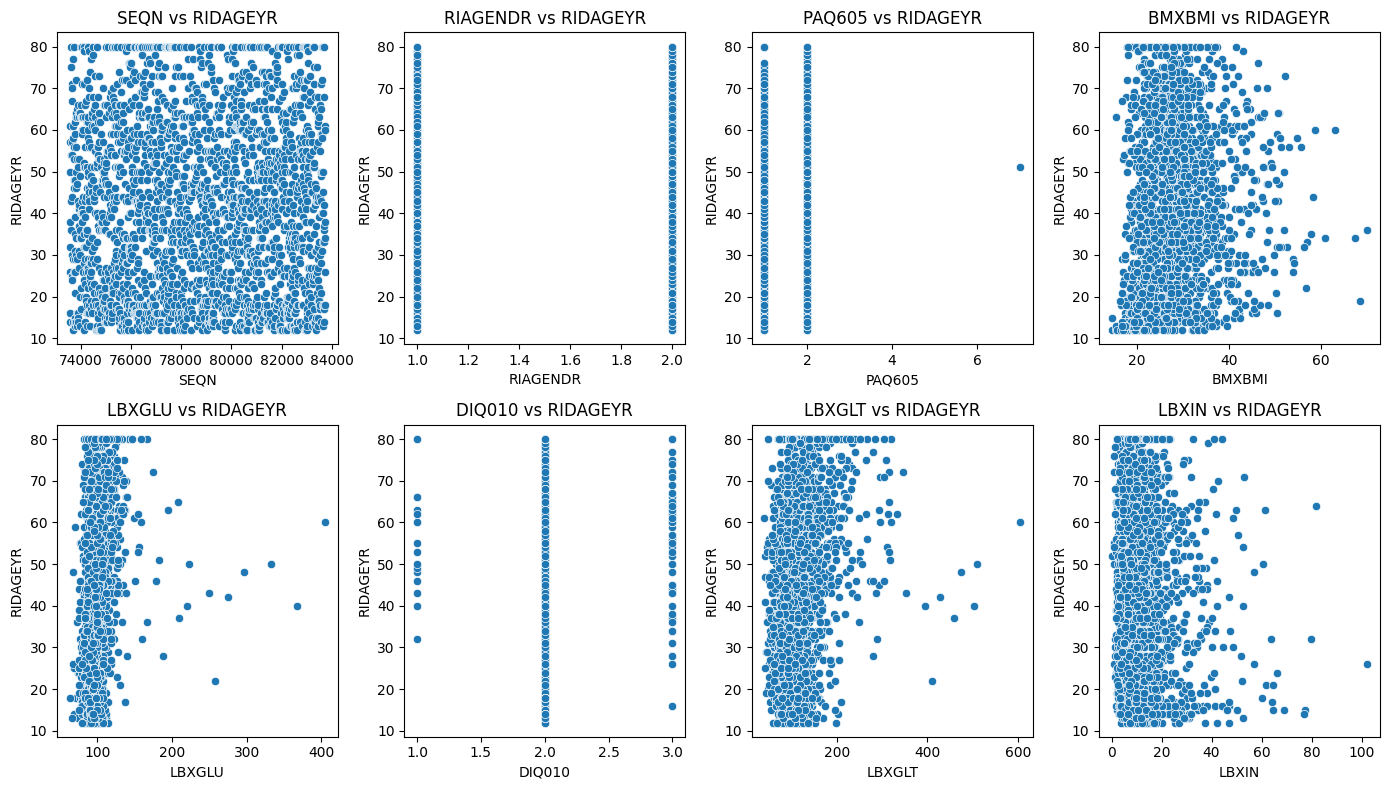

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('RIDAGEYR')  # Exclude target (age)

# Scatter plots: Numerical features vs. target ('RIDAGEYR')
plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(x=column, y='RIDAGEYR', data=data)
    plt.title(f'{column} vs RIDAGEYR')
plt.tight_layout()
plt.show()


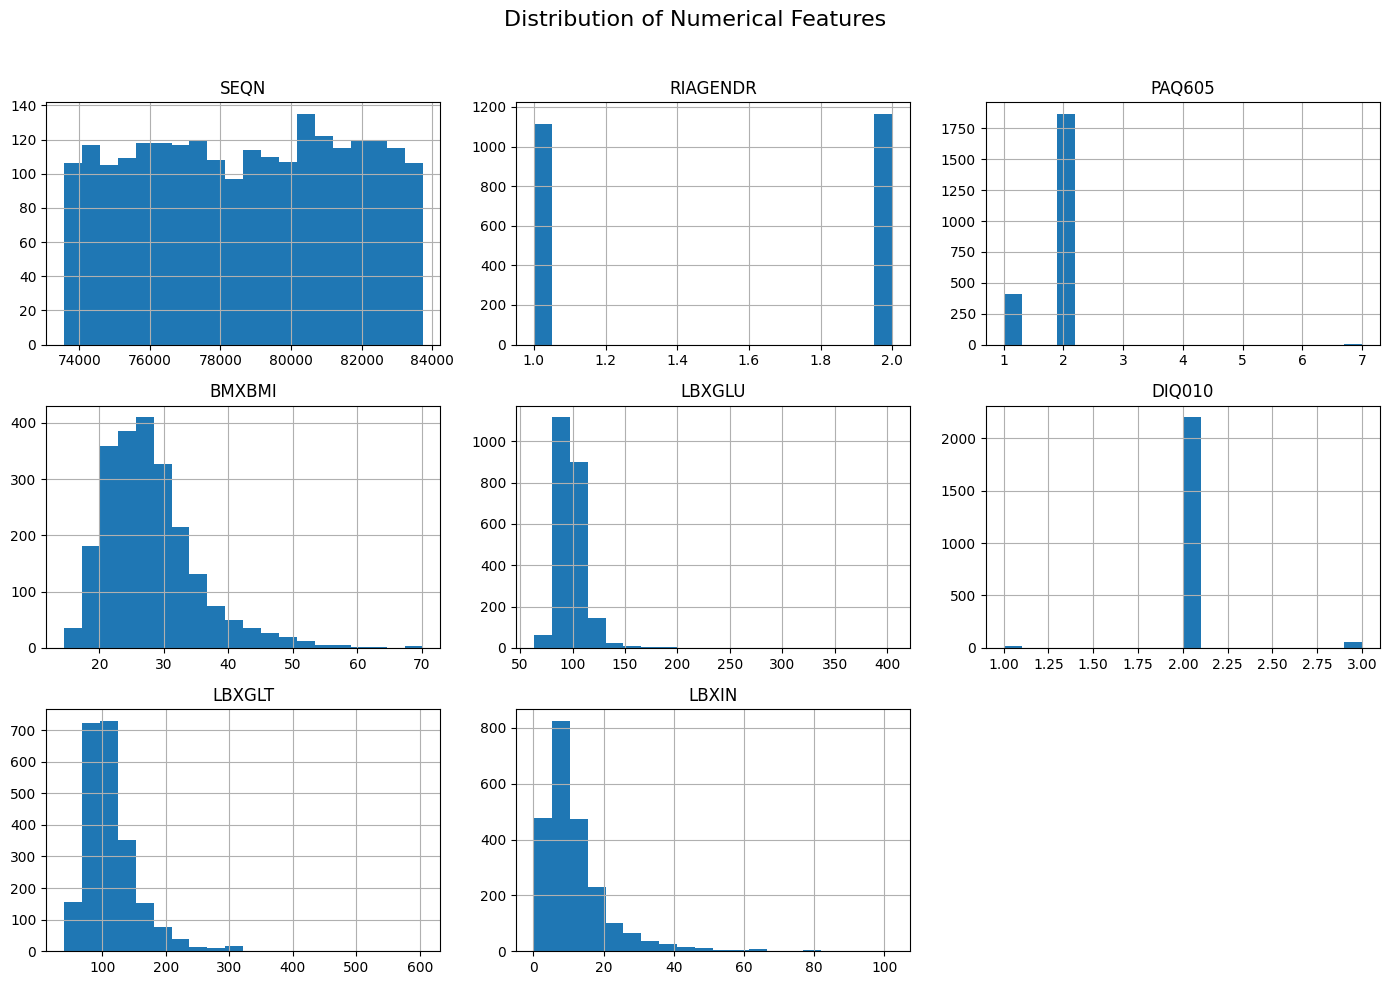

In [41]:
# Histograms for numerical features
data[numerical_features].hist(figsize=(14, 10), bins=20)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


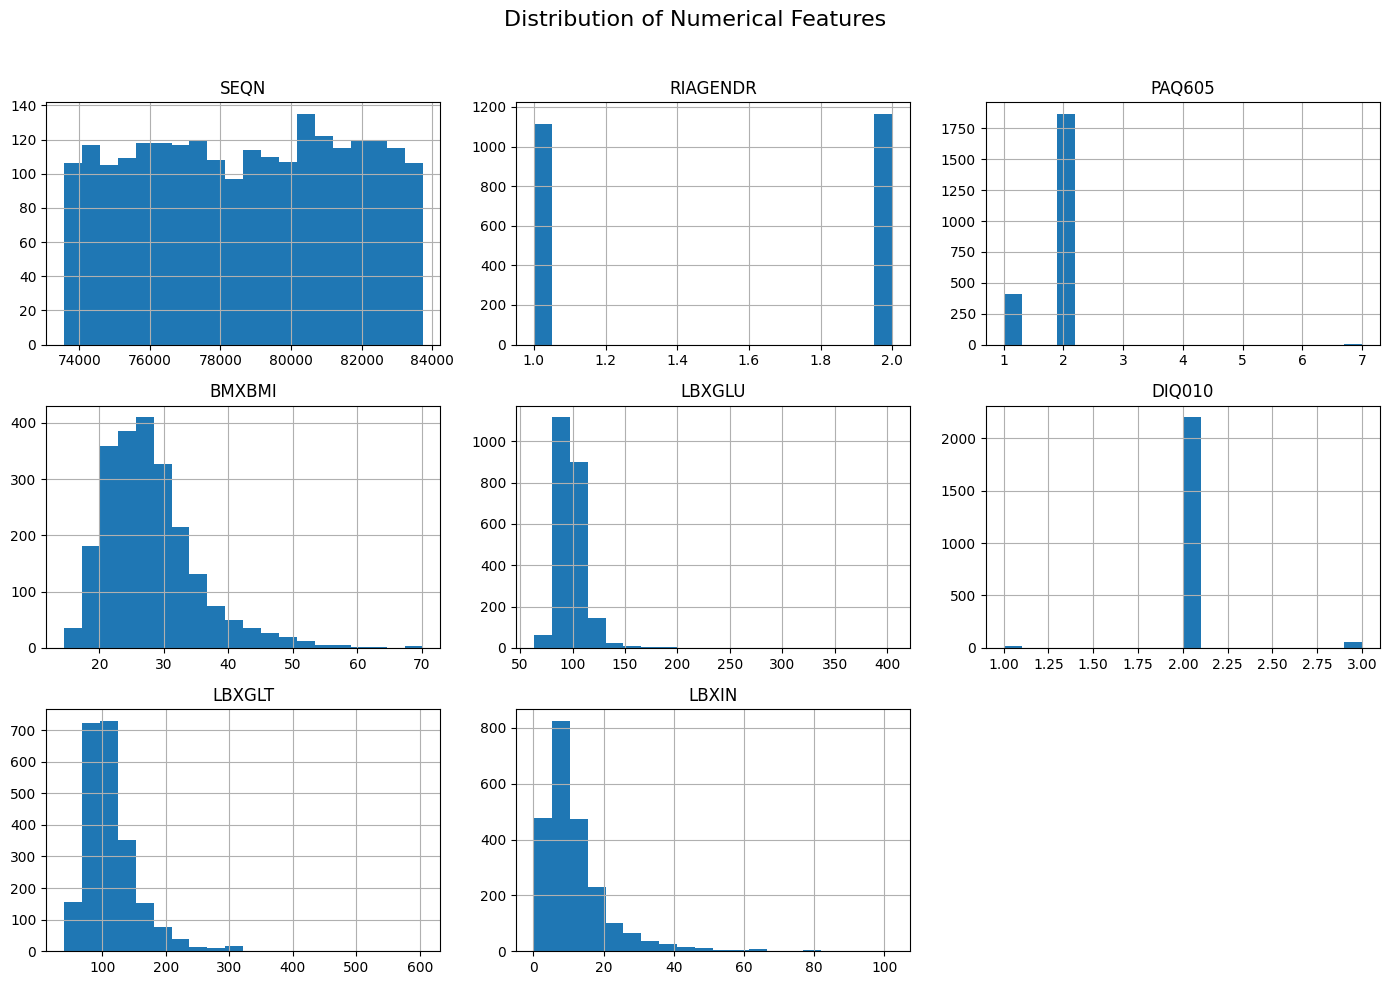

In [42]:
# Histograms for numerical features
data[numerical_features].hist(figsize=(14, 10), bins=20)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<ipython-input-43-67caef51b7a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


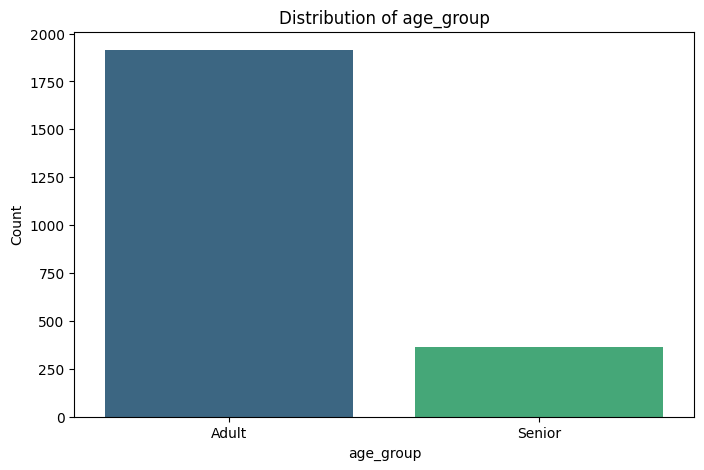

<ipython-input-43-67caef51b7a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


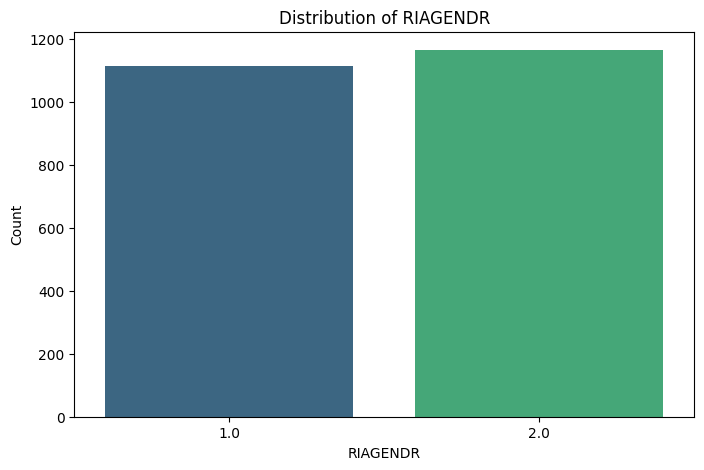

In [43]:
# Categorical columns
categorical_features = ['age_group', 'RIAGENDR']  # Adjust based on dataset columns

# Bar charts for categorical features
for column in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


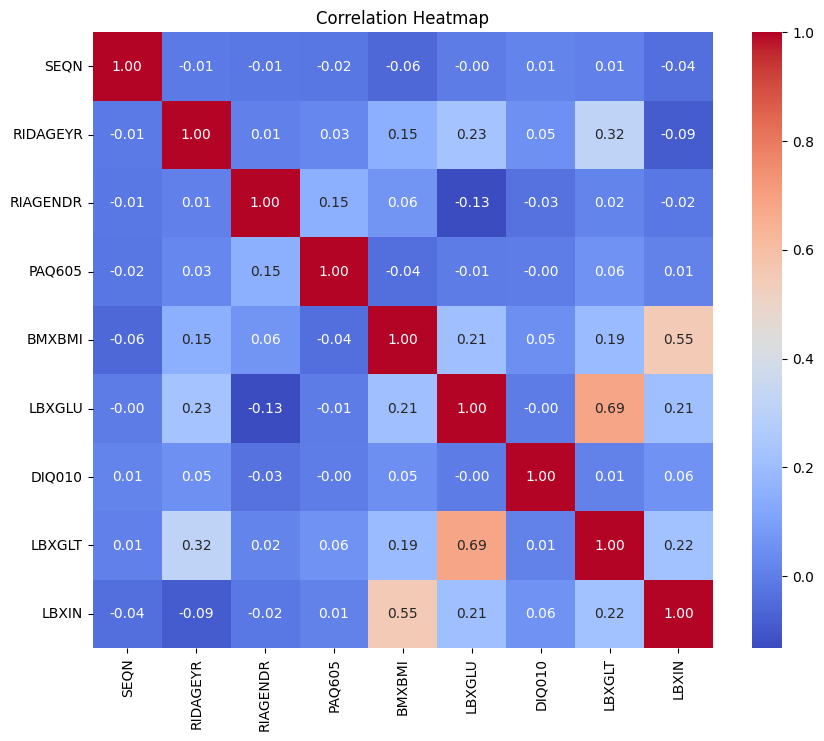

In [45]:
# Heatmap to show correlation between numerical features
plt.figure(figsize=(10, 8))

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [46]:
# Check for missing values
print("\nMissing Values Before:")
print(data.isnull().sum())

# Replace missing values for numerical columns with mean
for column in numerical_features:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mean(), inplace=True)

# Replace missing values for categorical columns with mode
for column in categorical_features:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Check for missing values after replacement
print("\nMissing Values After:")
print(data.isnull().sum())



Missing Values Before:
SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

Missing Values After:
SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64


<ipython-input-47-0f6c350d4c2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=data, palette='Set2')
<ipython-input-47-0f6c350d4c2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=data, palette='Set2')
<ipython-input-47-0f6c350d4c2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=data, palette='Set2')
<ipython-input-47-0f6c350d4c2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

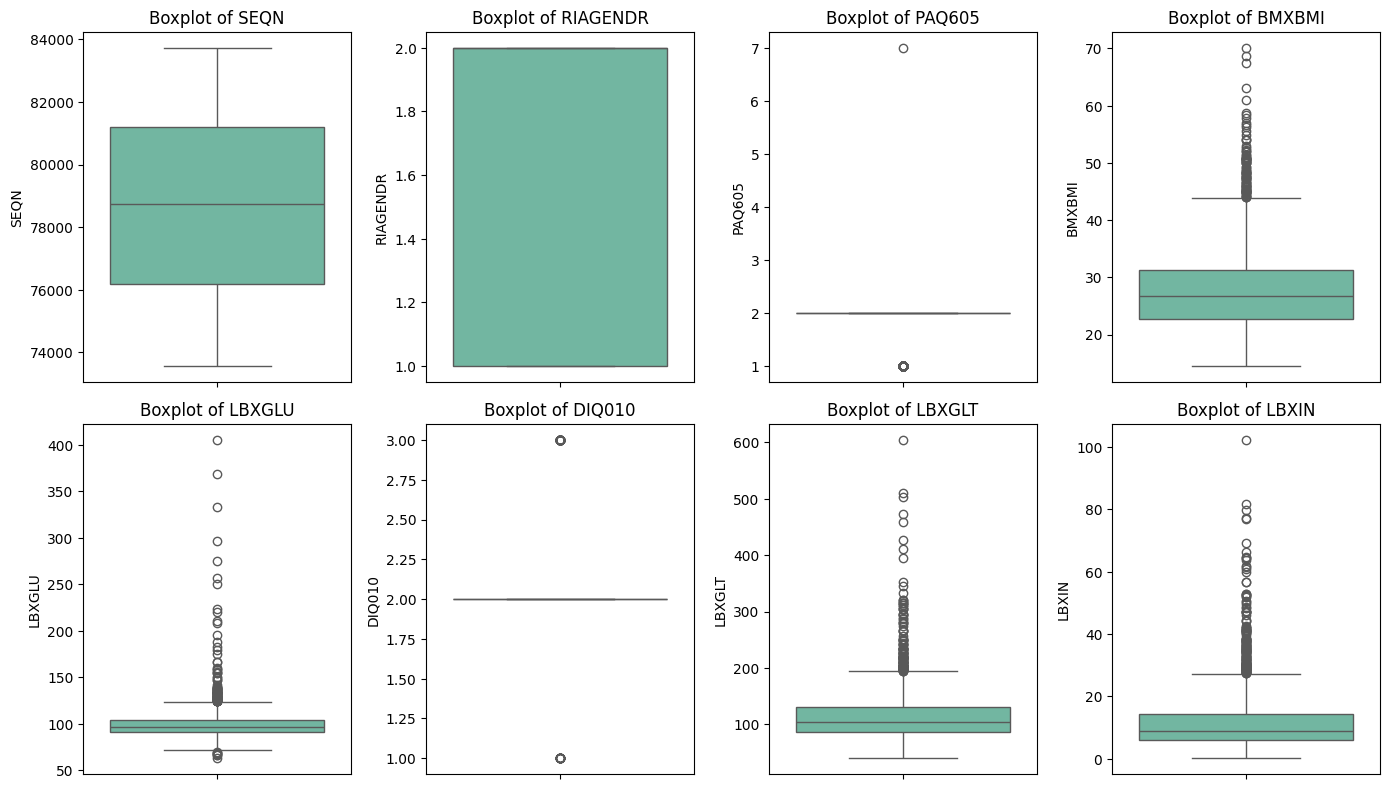

In [47]:
# Boxplots for numerical features to identify outliers
plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=column, data=data, palette='Set2')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [48]:
from sklearn.preprocessing import MinMaxScaler

# Scale numerical data with Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data[numerical_features]), columns=numerical_features)

# Replace original numerical columns with scaled values
data[numerical_features] = scaled_data
print("\nData Scaled Successfully")



Data Scaled Successfully



Class Distribution:
age_group
Adult     1914
Senior     364
Name: count, dtype: int64


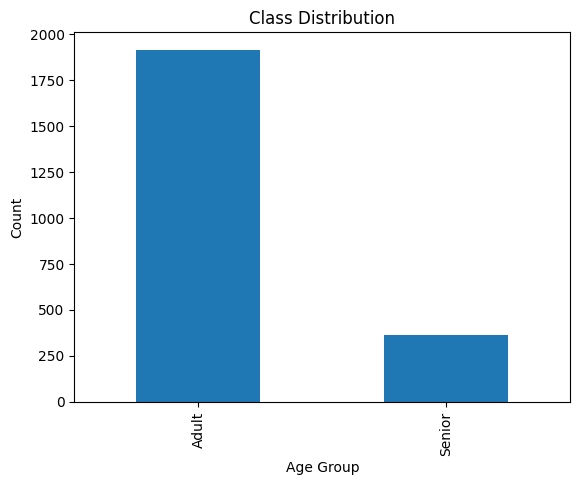

In [49]:
# Check the class distribution of categorical features
if 'age_group' in data.columns:
    class_distribution = data['age_group'].value_counts()
    print("\nClass Distribution:")
    print(class_distribution)

    # Plot class distribution
    class_distribution.plot(kind='bar', title="Class Distribution")
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.show()


final step for second project assigntment

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    confusion_matrix, classification_report, roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np


In [51]:
# Identify target (regression: 'RIDAGEYR', classification: 'age_group') and features
target = 'RIDAGEYR'  # Change to 'age_group' for classification
features = data.drop(columns=[target])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    features, data[target], test_size=0.2, random_state=42
)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 1822, Testing samples: 456


In [54]:
# Identify target (regression: 'RIDAGEYR', classification: 'age_group') and features
target = 'RIDAGEYR'  # Change to 'age_group' for classification
features = data.drop(columns=[target])

# One-hot encode categorical features using pandas get_dummies
# This converts categorical features into numerical representation
features = pd.get_dummies(features,
                           columns=['age_group'],  # Replace with actual categorical feature names
                           dtype=float)  # Ensure the output is numerical

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    features, data[target], test_size=0.2, random_state=42
)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Fit Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

Training samples: 1822, Testing samples: 456


In [55]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Regression Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Regression Model Evaluation Metrics:
Mean Squared Error (MSE): 185.81428920474877
Mean Absolute Error (MAE): 11.321751994670146
Root Mean Squared Error (RMSE): 13.631371508573478
R-squared (R²): 0.554577005469392


In [56]:
from sklearn.ensemble import RandomForestClassifier

# Update target to categorical
target = 'age_group'
X_train, X_test, y_train, y_test = train_test_split(
    features, data[target], test_size=0.2, random_state=42
)

# Fit Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on test set
y_pred_class = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)[:, 1]  # Assuming binary classification



Confusion Matrix:
[[382   0]
 [  0  74]]

Classification Report:
              precision    recall  f1-score   support

       Adult       1.00      1.00      1.00       382
      Senior       1.00      1.00      1.00        74

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456



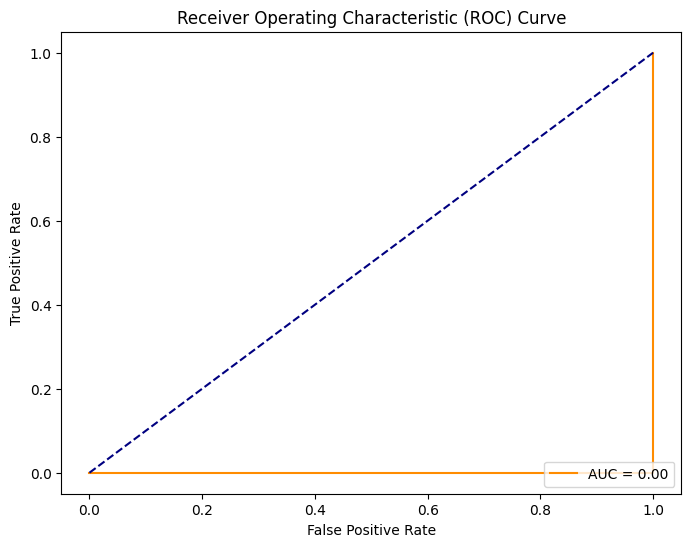

In [58]:
# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred_class)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

# ROC Curve and AUC
# Assuming 'Adult' is the positive class and 'Senior' is the negative class
# Map the labels to 0 and 1
y_test_binary = y_test.map({'Adult': 1, 'Senior': 0})

if len(np.unique(y_test_binary)) == 2:  # Check if binary classification
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()